# Training for MLR with Stock and strike as input and option price as output

In [4]:
from sklearn import linear_model
import pandas as pd

In [2]:
import csv
with open('bank_50_option_365_CE.csv', 'r') as infile, open('output.csv', 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    delete_column = -1  # index of the column you want to delete
    
    for row in reader:
        if row[delete_column] == '-':
            del row[delete_column]
        writer.writerow(row)

In [6]:
#Pandas DataFrame
option_df = pd.read_csv("output.csv")
option_df.tail()

option_df.drop(option_df.columns[[0,1,2,3,5,6,7,8,9,11,12,13,14,15]], axis=1,inplace=True)

In [7]:
option_df = option_df.rename(columns={'Strike Price':'strike', 'Settle Price':'Call price', 'Underlying Value':'Stock'})

In [8]:
option_df

,strike,Call price,Stock
0,21000,27.85,18127.35
1,22000,12.60,18127.35
2,23000,12.90,18127.35
3,24000,3.95,18127.35
4,18000,797.05,18127.35
...,...,...,...
5111,16900,140.65,16945.05
5112,16950,113.60,16945.05
5113,17000,88.95,16945.05
5114,17050,68.65,16945.05


In [29]:
option_df = option_df.astype({"strike":"float","Call price":"float", "Stock":"float"})
option_df = option_df.dropna()

In [30]:
X = option_df[['strike', 'Stock']]
y = option_df['Call price']

In [31]:
len(X)


5019

In [32]:
len(y)

5019

In [35]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [43]:
predicted_option_value = regr.predict([[16000, 16945.05]])

C:\Users\yasha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [130]:
print (predicted_option_value)

[1238.8203668]


# Testing

In [51]:
Test_data = pd.read_csv("MLR/test_data_01.csv")

In [53]:
Test_data = Test_data.dropna()

In [54]:
import csv
with open('MLR/test_data_01.csv', 'r') as infile, open('MLR/output.csv', 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    delete_column = -1  # index of the column you want to delete
    
    for row in reader:
        if row[delete_column] == '-':
            del row[delete_column]
        writer.writerow(row)

In [96]:
import csv

with open('MLR/output.csv', 'r') as input_file:
    with open('MLR/output1.csv', 'w', newline='') as output_file:
        reader = csv.reader(input_file)
        writer = csv.writer(output_file)
        next(reader)  # skip the header row
        for row in reader:
            writer.writerow(row)


In [97]:
#Pandas DataFrame
test_df = pd.read_csv("MLR/output1.csv")
test_df

,Unnamed: 0,OI,CHNG IN OI,VOLUME,IV,LTP,CHNG,BID QTY,BID,ASK,...,BID.1,ASK.1,ASK QTY.1,CHNG.1,LTP.1,IV.1,VOLUME.1,CHNG IN OI.1,OI.1,Unnamed: 22
0,NaN,83,-,8,172.45,"5,975.65",-123.35,50,"5,918.75","5,950.85",...,0.35,0.40,"5,550",0.05,0.35,115.96,"29,514","2,374","2,969",NaN
1,NaN,1,-,5,171.91,"5,011.00",-111.00,"1,800","4,893.40","4,976.25",...,0.35,0.45,400,0.05,0.35,94.00,"6,581",940,"1,681",NaN
2,NaN,"10,006",-416,709,-,"3,943.10",-138.00,"1,250","3,915.75","3,944.00",...,0.35,0.45,500,-0.05,0.35,73.59,"6,577",-46,"7,997",NaN
3,NaN,296,-105,116,-,"2,943.25",-141.15,450,"2,929.50","2,941.10",...,0.35,0.40,200,-0.20,0.40,55.05,"29,148","6,082","10,696",NaN
4,NaN,"9,967",-447,"2,020",-,"1,933.40",-160.10,50,"1,932.05","1,942.20",...,0.75,1.05,550,-0.15,0.80,39.16,"34,994","5,146","31,534",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,NaN,"43,939","2,943","46,074",50.61,0.90,-0.10,"6,250",0.90,0.95,...,"3,050.40","3,063.80",250,142.75,"3,055.00",79.99,"1,146",-951,"9,655",NaN
93,NaN,"8,471","1,043","6,685",63.18,0.80,-0.05,950,0.75,0.80,...,"4,018.00","4,060.65",100,156.95,"4,058.85",101.66,755,131,"3,626",NaN
94,NaN,"7,582","1,493","3,482",75.45,0.80,-0.05,"1,000",0.70,0.80,...,"5,041.10","5,073.35",50,147.65,"5,062.35",122.04,557,-524,"3,464",NaN
95,NaN,"3,681","1,333","2,595",86.49,0.75,-0.05,450,0.70,0.75,...,"6,013.75","6,065.90",250,219.65,"6,069.65",143.66,4,2,23,NaN


In [100]:
Strike_price = list(test_df.iloc[:, 11])


In [125]:
for i in range(len(Strike_price)):

    tmp = Strike_price[i].split(",")
    Strike_price[i] = float("".join(tmp))


In [127]:
print (Strike_price)

[11000.0, 12000.0, 13000.0, 14000.0, 15000.0, 15450.0, 15500.0, 15550.0, 15600.0, 15650.0, 15700.0, 15750.0, 15800.0, 15850.0, 15900.0, 15950.0, 16000.0, 16050.0, 16100.0, 16150.0, 16200.0, 16250.0, 16300.0, 16350.0, 16400.0, 16450.0, 16500.0, 16550.0, 16600.0, 16650.0, 16700.0, 16750.0, 16800.0, 16850.0, 16900.0, 16950.0, 17000.0, 17050.0, 17100.0, 17150.0, 17200.0, 17250.0, 17300.0, 17350.0, 17400.0, 17450.0, 17500.0, 17550.0, 17600.0, 17650.0, 17700.0, 17750.0, 17800.0, 17850.0, 17900.0, 17950.0, 18000.0, 18050.0, 18100.0, 18150.0, 18200.0, 18250.0, 18300.0, 18350.0, 18400.0, 18450.0, 18500.0, 18550.0, 18600.0, 18650.0, 18700.0, 18750.0, 18800.0, 18850.0, 18900.0, 18950.0, 19000.0, 19050.0, 19100.0, 19150.0, 19200.0, 19250.0, 19300.0, 19350.0, 19400.0, 19450.0, 19500.0, 19550.0, 19600.0, 19650.0, 19700.0, 19750.0, 20000.0, 21000.0, 22000.0, 23000.0, 24000.0]


In [104]:
Stock_price = []
for i in range(len(Strike_price)):
    Stock_price.append(16945.05)

In [128]:
print (Stock_price)

[16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05, 16945.05]


In [120]:
option_value = list(test_df.iloc[:, 5])


In [121]:

for i in range(len(option_value)):
    if (option_value[i] == "-"):
        option_value[i] = 0
    else:
        tmp = option_value[i].split(",")
        option_value[i] = float("".join(tmp))


In [129]:
print (option_value)

[5975.65, 5011.0, 3943.1, 2943.25, 1933.4, 1501.2, 1435.0, 0, 1360.0, 0, 1228.0, 0, 1148.1, 1243.15, 1056.05, 1233.5, 936.6, 1034.25, 853.1, 865.25, 743.8, 773.6, 645.45, 603.35, 546.45, 500.0, 451.25, 405.5, 362.1, 294.4, 278.4, 235.65, 200.0, 164.65, 133.0, 106.45, 83.0, 63.2, 46.5, 33.1, 24.2, 16.7, 11.6, 7.9, 5.65, 4.1, 3.4, 3.0, 2.45, 2.0, 1.8, 1.85, 1.7, 1.95, 1.55, 1.5, 1.7, 1.75, 1.65, 1.3, 1.5, 1.35, 1.4, 1.4, 1.15, 1.3, 1.35, 1.45, 1.95, 1.4, 1.35, 1.4, 1.85, 1.35, 1.5, 1.15, 1.25, 1.15, 1.5, 1.1, 1.4, 1.05, 1.1, 1.05, 1.05, 1.0, 1.1, 0.9, 1.1, 1.05, 0.95, 0.9, 0.9, 0.8, 0.8, 0.75, 0.6]


In [152]:
predict_value = []
f = open("MLR.txt", "a")

for i, j in zip(Strike_price, Stock_price):
    
    predict_value.append(regr.predict([[i, j]]))
    f.write("Strike price = "+str(i)+"Stock price = "+str(j)+"option value = "+str(float(regr.predict([[i, j]]))) + "\n")

f.close()

C:\Users\yasha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\yasha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\yasha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\yasha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWa

In [144]:
pred_option_value = [float(x) for x in predict_value]

In [145]:
print (pred_option_value)

[3896.0976777422684, 3364.6422155542678, 2833.186753366267, 2301.7312911782665, 1770.2758289902658, 1531.1208710056653, 1504.548097896266, 1477.9753247868648, 1451.4025516774655, 1424.8297785680643, 1398.257005458665, 1371.6842323492656, 1345.1114592398644, 1318.538686130465, 1291.9659130210657, 1265.3931399116645, 1238.8203668022652, 1212.247593692864, 1185.6748205834647, 1159.1020474740653, 1132.5292743646642, 1105.9565012552648, 1079.3837281458655, 1052.8109550364643, 1026.238181927065, 999.6654088176638, 973.0926357082644, 946.5198625988651, 919.9470894894639, 893.3743163800646, 866.8015432706652, 840.228770161264, 813.6559970518647, 787.0832239424635, 760.5104508330642, 733.9376777236648, 707.3649046142637, 680.7921315048643, 654.219358395465, 627.6465852860638, 601.0738121766644, 574.5010390672633, 547.9282659578639, 521.3554928484646, 494.7827197390634, 468.20994662966405, 441.6371735202647, 415.0644004108635, 388.4916273014642, 361.918854192063, 335.34608108266366, 308.77330797

In [148]:
print (len(pred_option_value), len(option_value))

97 97


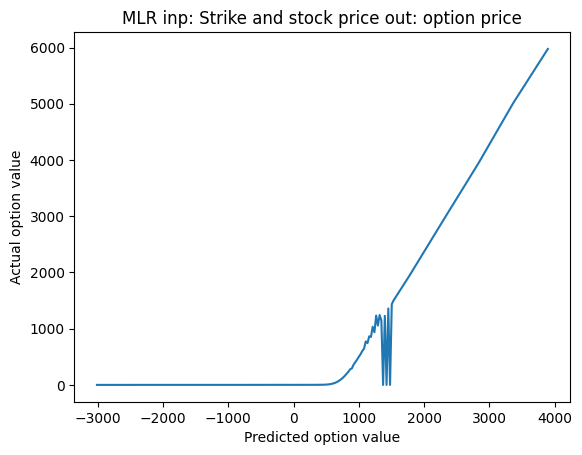

<Figure size 640x480 with 0 Axes>

In [154]:
import matplotlib.pyplot as plt 

X = pred_option_value
Y = option_value

plt.plot(X, Y)

plt.xlabel("Predicted option value")
plt.ylabel("Actual option value")

plt.title("MLR inp: Strike and stock price out: option price")

plt.show()
plt.savefig("images/MRL1.png")

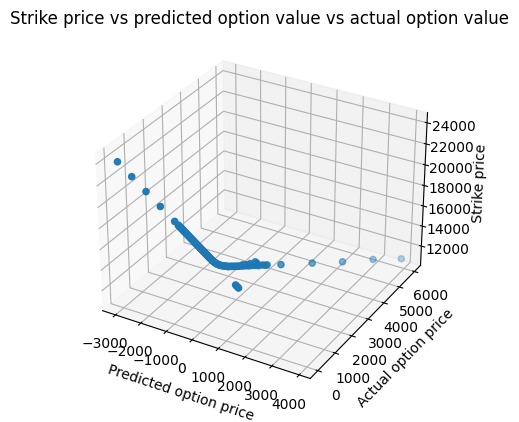

In [157]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

X = pred_option_value
Y = option_value
Z = Strike_price

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z)

# Add labels and title
ax.set_xlabel('Predicted option price')
ax.set_ylabel('Actual option price')
ax.set_zlabel('Strike price')
ax.set_title('Strike price vs predicted option value vs actual option value')

# Show the plot
plt.show()




# MLR with strike, stock as input and to predict implied volatality

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('SVM_train_02.csv')

In [3]:
dataset

,Strike,Stock,option_price,IV
0,21000.0,18127.35,27.60,0.14
1,22000.0,18127.35,12.25,0.15
2,23000.0,18127.35,9.40,0.18
3,24000.0,18127.35,6.85,0.20
4,18000.0,18127.35,789.10,0.11
...,...,...,...,...
4239,16900.0,16945.05,133.00,0.12
4240,16950.0,16945.05,106.45,0.12
4241,17000.0,16945.05,83.00,0.12
4242,17050.0,16945.05,63.20,0.12


In [4]:
X = dataset[dataset.columns[dataset.columns.isin(['Strike','Stock'])]]
Y = dataset[dataset.columns[dataset.columns.isin(['IV'])]]

In [5]:
from sklearn import linear_model

In [6]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

# predict iv

In [10]:
strike_price = 16400
stock_price = 16951.70

Iv = regr.predict([[16400, 16951.70]])

C:\Users\yasha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
Iv = float(Iv)

# Train Linear regression inp: IV, output: option price

# cal option price using iv

In [20]:
dataset = pd.read_csv("SVM_train_02.csv")

In [21]:
dataset

,Strike,Stock,option_price,IV
0,21000.0,18127.35,27.60,0.14
1,22000.0,18127.35,12.25,0.15
2,23000.0,18127.35,9.40,0.18
3,24000.0,18127.35,6.85,0.20
4,18000.0,18127.35,789.10,0.11
...,...,...,...,...
4239,16900.0,16945.05,133.00,0.12
4240,16950.0,16945.05,106.45,0.12
4241,17000.0,16945.05,83.00,0.12
4242,17050.0,16945.05,63.20,0.12


In [22]:
X = dataset[['IV']]
Y = dataset[['option_price']]

In [23]:
X, Y

(        IV
 0     0.14
 1     0.15
 2     0.18
 3     0.20
 4     0.11
 ...    ...
 4239  0.12
 4240  0.12
 4241  0.12
 4242  0.12
 4243  0.10
 
 [4244 rows x 1 columns],
       option_price
 0            27.60
 1            12.25
 2             9.40
 3             6.85
 4           789.10
 ...            ...
 4239        133.00
 4240        106.45
 4241         83.00
 4242         63.20
 4243        278.40
 
 [4244 rows x 1 columns])

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [12]:
import numpy as np
from scipy.stats import norm


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:

model = LinearRegression()

In [28]:
model.fit(x_train, y_train)

LinearRegression()

In [32]:
pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'])

,Coeff
IV,28.988241


In [33]:

predictions = model.predict(x_test)

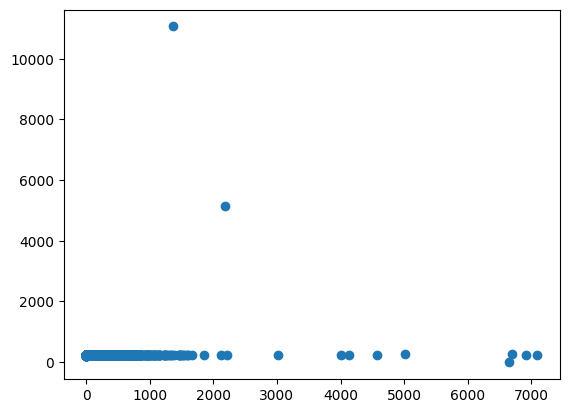

In [34]:
plt.scatter(y_test, predictions)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.066e+03,
        1.950e+02, 3.000e+00, 4.000e+00, 4.000e+00]),
 array([-9701.96485727, -8045.99614631, -6390.02743535, -4734.05872439,
        -3078.09001343, -1422.12130247,   233.84740849,  1889.81611945,
         3545.78483041,  5201.75354137,  6857.72225233]),
 <BarContainer object of 10 artists>)

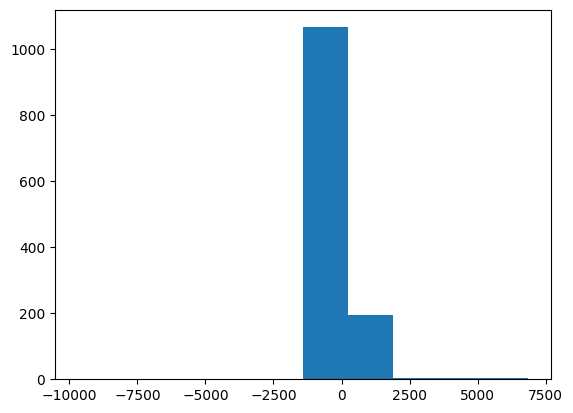

In [35]:
plt.hist(y_test - predictions)

In [36]:
from sklearn import metrics

metrics.mean_absolute_error(y_test, predictions)

metrics.mean_squared_error(y_test, predictions)

np.sqrt(metrics.mean_squared_error(y_test, predictions))

623.7749342681888

In [13]:
def black_scholes(S, K, T, r, sigma, option_type):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    if option_type == 'call':
        return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    elif option_type == 'put':
        return K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type")


In [19]:
# Example usage:
S = 16951.70
K = 16400
T = 1/365.0
r = 0.10
sigma = Iv
option_type = 'call'

# Use the implied volatility to predict the option price
predicted_price = black_scholes(S, K, T, r, sigma, option_type)

print(f"Implied volatility: {sigma:.4f}")
print(f"Predicted price: {predicted_price:.4f}")


Implied volatility: 1.0880
Predicted price: 720.0205
